# TEMA 1

 De dat exemple și de reprezentat grafic cele 4 cazuri de compatibilitate în care se poate afla un program liniar

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def adaugaLaGrafic(x, y1, y2):
    plt.plot(x, y1)
    plt.fill_between(x, y1, y2, alpha=0.2)

## Program liniar compatibil cu optim finit cu solutie optima unica:

    Consider urmatorul sistem:
        max x + y
        x - y <= 2
        2x + y <= 1

    Calculez coordonatele punctului de optim:
        y = x - 2
        y = 1 - 2 * x
            => x - 2 = 1 - 2 * x
            => 3 * x = 3
            => x = 1
                => y = -1

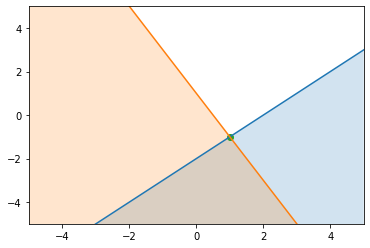

In [3]:
def programFinitSolutieUnica():
    plt.figure()
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    x = np.linspace(-5, 5, 100)

    # x - y <= 2
    y = x - 2
    adaugaLaGrafic(x, y, y - 20)

    # 2x + y <= 1
    y = 1 - 2 * x
    adaugaLaGrafic(x, y, y - 20)

    # punctul de optim
    plt.scatter(1, -1)

    plt.show()

programFinitSolutieUnica()

## Program liniar compatibil cu optim finit cu o infinitate de solutii optime:

    Consider urmatorul sistem:
        max x + y
        y <= -1

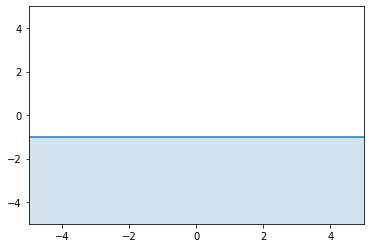

In [4]:
def programFinitInfinitateSolutii():
    plt.figure()
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    x = np.linspace(-5, 5, 100)

    # y <= -1
    y = - x * 0 - 1
    adaugaLaGrafic(x, y, y - 10)

    plt.show()

programFinitInfinitateSolutii()

## Program liniar compatibil cu optim infinit:

    Consider urmatorul sistem:
        max x + y
        x <= -1

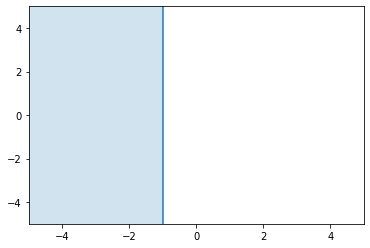

In [5]:
def programOptimInfinit():
    plt.figure()
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    x = np.linspace(-5, 5, 100)

    # x <= -1
    plt.plot(0 * x - 1, x)
    plt.fill_betweenx(x, -1, -10, alpha=0.2)

    plt.show()
    
programOptimInfinit()

## Program liniar incompatibil:

    Consider urmatorul sistem:
        max x + y
        -4x + 11y >= 3
        2x + y >= 7
        y <= -1

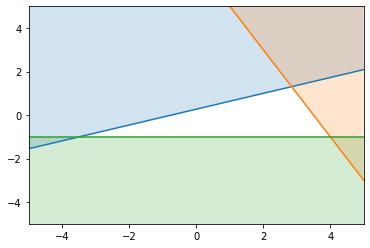

In [6]:
def programIncompatibil():
    plt.figure()
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    x = np.linspace(-5, 5, 100)

    # -4x + 11y >= 3
    y = (3 + 4 * x) / 11
    adaugaLaGrafic(x, y, y + 10)

    # 2x + y >= 7
    y = 7 - 2 * x
    adaugaLaGrafic(x, y, y + 10)

    # y <= -1
    y = - x * 0 - 1
    adaugaLaGrafic(x, y, y - 10)

    plt.show()

programIncompatibil()

# TEMA 2
    1. De calculat inversa unei matrici
    2. De aplicat lema substituției

Calculeaza x astfel incat Ax = B folosind metoda substitutiei descendente:

In [7]:
def substitutieDescendenta(a, b):
    assert a.shape[0] == a.shape[1], 'Matricea introdusa nu este patratica!'
    assert a.shape[0] == b.shape[0], 'Matricea introdusa si vectorul b nu se potrivesc!'

    n = b.shape[0] - 1
    x = np.zeros(shape=n+1)
    x[n] = b[n] / a[n, n]

    for k in range(n - 1, -1, -1):
        s = np.dot(a[k, k + 1:], x[k + 1:])
        x[k] = (b[k] - s) / a[k, k]

    return x

Calculeaza x astfel incat Ax = B folosind metoda Gauss cu pivotare totala:

In [8]:
def gaussPivotareTotala(a, b):
    assert a.shape[0] == a.shape[1], 'Matricea introdusa nu este patratica!'
    assert a.shape[0] == b.shape[0], 'Matricea introdusa si vectorul b nu se potrivesc!'
    assert np.linalg.det(a) != 0, 'Sistem incompatibil sau sistem compatibil nedeterminat!'

    a_ext = np.concatenate((a, b[:, None]), axis=1)
    n = a.shape[0] - 1
    index = np.array(range(n + 1))

    for k in range(n):
        poz = np.argmax(np.abs(a_ext[k:, k:n]))
        p = k + int(poz / (n - k))
        m = k + poz - ((p - k) * (n - k))

        if a_ext[p, m] == 0:
            raise AssertionError('Sistem incompatibil sau sistem compatibil nedeterminat.')

        if p != k:
            a_ext[[p, k], :] = a_ext[[k, p], :]

        if m != k:
            a_ext[:, [m, k]] = a_ext[:, [k, m]]
            index[[m, k]] = index[[k, m]]

        for j in range(k + 1, n + 1):
            mjk = a_ext[j, k] / a_ext[k, k]
            a_ext[j, :] -= mjk * a_ext[k, :]

    if a_ext[n, n] == 0:
        raise AssertionError('Sistem incompatibil sau sistem compatibil nedeterminat.')

    y = substitutieDescendenta(a_ext[:, :-1], a_ext[:, -1])

    x = list(range(n + 1))
    for i in range(n + 1):
        x[index[i]] = y[i]

    return np.array(x)

## Calculeaza inversa matricei A folosind metoda Gauss pentru determinarea inversei:

In [9]:
def calculeazaInversa(a):
    assert a.shape[0] == a.shape[1], 'Matricea introdusa nu este patratica!'
    assert np.linalg.det(a) != 0, 'Matricea introdusa nu este inversabila!'

    inversa = np.zeros_like(a)
    n = a.shape[0]
    ident = np.eye(n)

    for i in range(n):
        inversa[:, i] = gaussPivotareTotala(a, ident[:, i])

    return inversa

In [10]:
a = np.array([
        [2, 0, 0],
        [0, 1, 0],
        [0, 0, 4]
    ], dtype=np.float)
print('Matricea initiala:\n', a, '\n')

b = calculeazaInversa(a)
print('Inversa matricei:\n', b, '\n')

Matricea initiala:
 [[2. 0. 0.]
 [0. 1. 0.]
 [0. 0. 4.]] 

Inversa matricei:
 [[0.5  0.   0.  ]
 [0.   1.   0.  ]
 [0.   0.   0.25]] 



## Aplica lema substitutiei pentru matricea B si vectorul C:

In [11]:
def lemaSubstitutiei(B, C, k=1):
    assert k in range(B.shape[0]), 'k nu apartine intervalului [1, m] !'
    assert C.shape[0] == B.shape[0], 'C nu apartine R^m !'

    B_inv = calculeazaInversa(B)

    B_tilde = B.copy()
    B_tilde[:, k] = C

    y = B_inv @ C
    if y[k] == 0:
        raise AssertionError('B nu e nesingulara!')

    eta = -y / y[k]
    eta[k] = 1 / y[k]

    E = np.eye(B.shape[0])
    E[:, k] = eta

    B_tilde_inv = E @ B_inv

    return B_tilde, B_tilde_inv

In [12]:
a = np.array([
    [2, 0, 0],
    [0, 1, 0],
    [0, 0, 4]
], dtype=np.float)
print('Matricea initiala:\n', a, '\n')

c, d = lemaSubstitutiei(a, np.array([1, 5, 2]))
print('B tilde:\n', c, '\n')
print('Inversa lui B tilde:\n', d, '\n')

Matricea initiala:
 [[2. 0. 0.]
 [0. 1. 0.]
 [0. 0. 4.]] 

B tilde:
 [[2. 1. 0.]
 [0. 5. 0.]
 [0. 2. 4.]] 

Inversa lui B tilde:
 [[ 0.5  -0.1   0.  ]
 [ 0.    0.2   0.  ]
 [ 0.   -0.1   0.25]] 



# TEMA 3 & TEMA 4
    De implementat algoritmul simplex în varianta primală, respectiv duală.

Functii ajutatoare:

In [13]:
def pivot(matrice, linie_pivot, coloana_pivot):
    """ Executa un pas din reducerea Gaussiana pentru pivotul dat """
    matrice[linie_pivot] /= matrice[linie_pivot, coloana_pivot]

    for linie in range(len(matrice)):
        if linie != linie_pivot:
            matrice[linie] -= matrice[linie, coloana_pivot] * matrice[linie_pivot]


def strCoeficienti(sir):
    """ Transcrie un sir de coeficienti ca formula """
    s = f'{sir[0]} * x1 '
    for i in range(1, len(sir)):
        if sir[i] >= 0:
            s += f'+ {sir[i]}'
        else:
            s += f'- {-1 * sir[i]}'
        s += f' * x{i + 1} '
    return s

Clasa cu rezolvarea problemei:

In [14]:
class Sistem:
    def __init__(self, matrice, semne, coeficienti, maxim=True):
        assert matrice.shape[0] == semne.shape[0] and matrice.shape[1] - 1 == coeficienti.shape[0], \
            'Dimensiunile datelor de intrare nu se potrivesc!'

        self.matrice = matrice                  # matricea sistemului
        self.semne = semne                      # semnele (in)ecuatiilor
        self.coeficienti = coeficienti          # coeficientii din max
        self.variabile_libere = 0               # variabilele adaugate pentru aducerea la forma LP standard
        self.tip = 'max' if maxim else 'min'    # daca programul calculeaza maximul / minimul

    def __str__(self):
        s = f'{self.tip} {strCoeficienti(self.coeficienti)}\n'
        for i in range(self.matrice.shape[0]):
            s += f'{strCoeficienti(self.matrice[i][:-1])} {self.semne[i]} {self.matrice[i][-1]}\n'
        return s

    def adaugaVariabila(self, coeficient, index):
        """ Adauga o variabila ajutatoare in matrice """
        termeni_liberi = self.matrice[:, -1]
        aux = np.array([coeficient if i == index else 0 for i in range(self.matrice.shape[0])], dtype=float)
        self.matrice = np.concatenate((self.matrice[:, :-1], aux[:, None]), axis=1)
        self.matrice = np.concatenate((self.matrice, termeni_liberi[:, None]), axis=1)

    def adaugaTermeniLiberi(self, semn=-1):
        """ Adauga termenii liberi in matricea sistemului """
        termeni_liberi = np.array([semn * c for c in self.coeficienti] + [0] * (self.variabile_libere + 1), dtype=float)
        self.matrice = np.concatenate((self.matrice, termeni_liberi[None, :]))
        self.semne = np.append(self.semne, ['='])

    def extrageTermeniLiberi(self):
        """ Extrage termenii liberi din matricea sistemului si ii muta in vectorul de coeficienti """
        self.coeficienti = self.matrice[-1][:-1]
        self.matrice = self.matrice[:-1]

    def standardizareLP(self):
        """ Aduce problema in forma LP standard """
        for i in range(len(self.semne)):
            if self.semne[i] == '=':
                continue
            elif self.semne[i] == '<=':
                self.adaugaVariabila(1, i)
            elif self.semne[i] == '>=':
                self.adaugaVariabila(-1, i)

            self.semne[i] = '='
            self.variabile_libere += 1

        self.adaugaTermeniLiberi()

    def simplexPrimal(self):
        """ Tema 3: Algoritmul simplex in varianta primala """
        self.standardizareLP()

        while True:
            coloana_pivot = -1
            for coloana, valoare in enumerate(self.matrice[-1]):
                if valoare < 0:
                    coloana_pivot = coloana
                    break

            if coloana_pivot == -1:
                break

            linie_pivot = -1
            raport_minim = np.inf
            for linie, valoare in enumerate(self.matrice[:-1, -1]):
                elem = self.matrice[linie, coloana_pivot]
                if elem > 0:
                    raport = valoare / elem
                    if raport < raport_minim:
                        linie_pivot = linie
                        raport_minim = raport

            if linie_pivot == -1:
                return 'Valoarea optima: infinit'

            pivot(self.matrice, linie_pivot, coloana_pivot)

        s = f'Valoarea optima: {self.matrice[-1][-1]}\n'
        for index in range(self.matrice.shape[1] - 1 - self.variabile_libere):
            s += f'x{index + 1} = {self.matrice[-1, index]}\n'
        return s

    def transformareDual(self):
        """ Transforma sistemul pentru aplicarea algoritmului dual """
        self.adaugaTermeniLiberi(1)
        self.matrice = self.matrice.T
        self.extrageTermeniLiberi()
        self.tip = 'min' if self.tip == 'max' else 'max'
        operator = '<=' if self.tip == 'max' else '>='
        self.semne = [operator] * self.matrice.shape[0]

    def simplexDual(self):
        """ Tema 4: Algoritmul simplex in varianta duala """
        self.transformareDual()
        self.standardizareLP()
        self.matrice[-1] *= -1

        while True:
            linie_pivot = -1
            for linie, valoare in enumerate(self.matrice[:, -1]):
                if valoare < 0:
                    linie_pivot = linie
                    break

            if linie_pivot == -1:
                break

            coloana_pivot = -1
            raport_minim = np.inf
            for coloana, valoare in enumerate(self.matrice[-1, :-1]):
                elem = self.matrice[linie_pivot][coloana]
                if elem < 0:
                    raport = valoare / elem
                    if raport < raport_minim:
                        coloana_pivot = coloana
                        raport_minim = raport

            if coloana_pivot == -1:
                return 'Valoarea optima: infinit'

            pivot(self.matrice, linie_pivot, coloana_pivot)

        s = f'Valoarea optima: {self.matrice[-1][-1]}\n'
        for index in range(self.matrice.shape[1] - 1 - self.variabile_libere):
            s += f'y{index + 1} = {-self.matrice[-1, self.variabile_libere + index]}\n'
        return s

## TEMA 3:
    Algoritmul simplex în varianta primală

In [18]:
s = Sistem(np.array([[1, 3, 3], [2, 7, 1]], dtype=float),
           np.array(['>=', '<=']),
           np.array([3, 5], dtype=float))
print(f'Sistemul initial:\n{s}')
print(f'Rezolvarea cu simplex primal:\n{s.simplexPrimal()}')

Sistemul initial:
max 3.0 * x1 + 5.0 * x2 
1.0 * x1 + 3.0 * x2  >= 3.0
2.0 * x1 + 7.0 * x2  <= 1.0

Rezolvarea cu simplex primal:
Valoarea optima: 1.5
x1 = 0.0
x2 = 5.5



## TEMA 4:
    Algoritmul simplex în varianta duală

In [19]:
s = Sistem(np.array([[1, -3, -2, 2], [-1, 4, -3, -1], [2, 1, -4, 1]], dtype=float),
           np.array(['<=', '<=', '<=']),
           np.array([-1, -2, -4], dtype=float))
print(f'Sistemul initial:\n{s}')
s.transformareDual()

print(f'Sistemul dupa transformarea duala:\n{s}')
print(f'Rezolvarea cu simplex dual:\n{s.simplexDual()}')

Sistemul initial:
max -1.0 * x1 - 2.0 * x2 - 4.0 * x3 
1.0 * x1 - 3.0 * x2 - 2.0 * x3  <= 2.0
-1.0 * x1 + 4.0 * x2 - 3.0 * x3  <= -1.0
2.0 * x1 + 1.0 * x2 - 4.0 * x3  <= 1.0

Sistemul dupa transformarea duala:
min 2.0 * x1 - 1.0 * x2 + 1.0 * x3 
1.0 * x1 - 1.0 * x2 + 2.0 * x3  >= -1.0
-3.0 * x1 + 4.0 * x2 + 1.0 * x3  >= -2.0
-2.0 * x1 - 3.0 * x2 - 4.0 * x3  >= -4.0

Rezolvarea cu simplex dual:
Valoarea optima: 1.1
y1 = 0.0
y2 = 1.2
y3 = 0.1

